In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

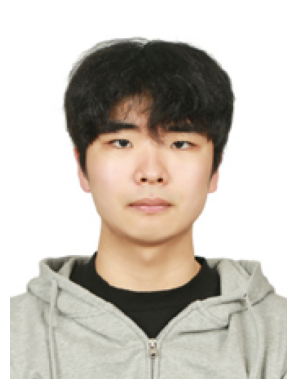

In [8]:
# Image Load
image_path = "C:/Users/user/Desktop/김동현_면접사진.jpg"

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
# 이미지를 텐서로 변환
image = tf.convert_to_tensor(np.array(image), dtype=tf.float32)

# 텐서 정보 출력
print("Tensor shape:", image.shape)
print("Tensor data type:", image.dtype)

Tensor shape: (227, 170, 3)
Tensor data type: <dtype: 'float32'>


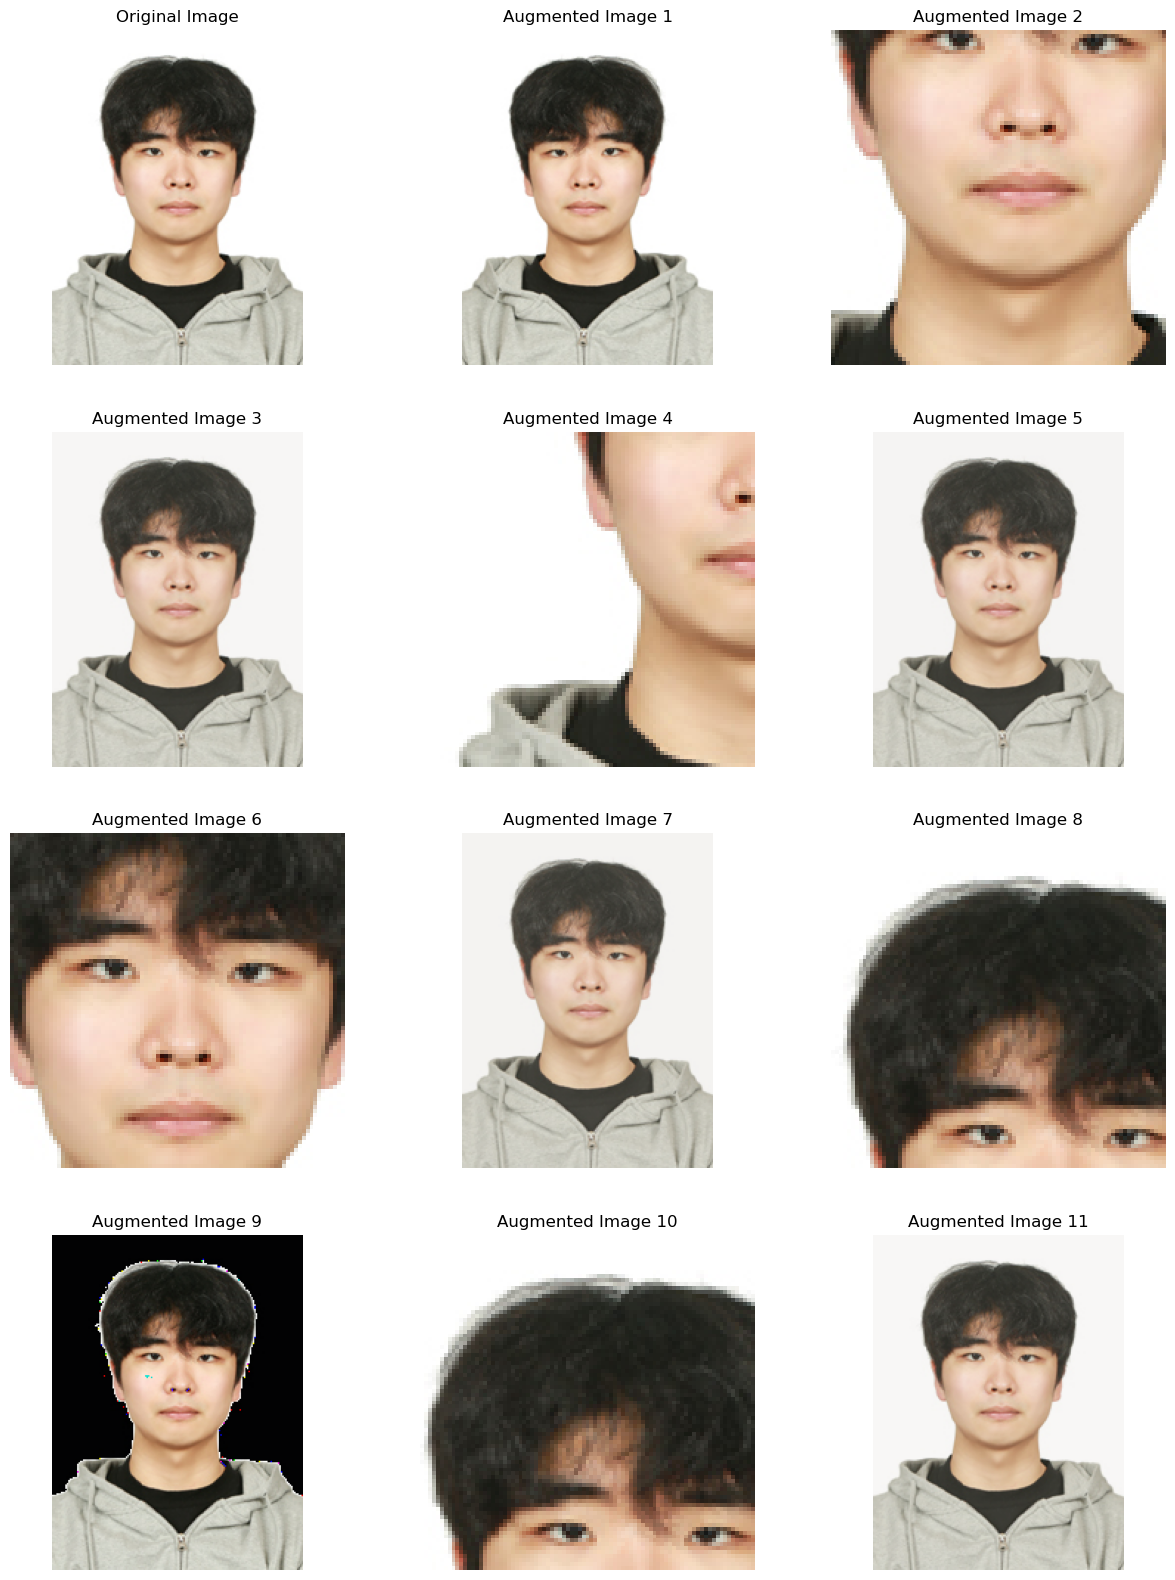

In [15]:
# 증강 함수 정의
def augment_image(image, num_augmented=5):
    augmented_images = []

    # Mirroring
    image_flipped = tf.image.flip_left_right(image)
    augmented_images.append(image_flipped)

    # Random Crop and Color Shift
    height, width = tf.shape(image)[0], tf.shape(image)[1]
    crop_size = tf.minimum(height, width) // 2

    for _ in range(num_augmented):
        # Random Crop
        image_cropped = tf.image.random_crop(image, size=[crop_size, crop_size, 3])
        augmented_images.append(image_cropped)
        
        # Color Shifting
        image_shifted = tf.image.random_brightness(image, max_delta=0.2)
        image_shifted = tf.image.random_contrast(image_shifted, lower=0.8, upper=1.2)
        augmented_images.append(image_shifted)

    return augmented_images

# 증강된 이미지 생성
augmented_images = augment_image(image)

# 시각화 함수
def visualize_images(original, augmented_images):
    num_images = len(augmented_images) + 1
    cols = 3
    rows = (num_images + cols - 1) // cols
    
    plt.figure(figsize=(15, 5 * rows))
    
    # 원본 이미지 시각화
    plt.subplot(rows, cols, 1)
    plt.imshow(original.numpy().astype('uint8'))
    plt.title('Original Image')
    plt.axis('off')

    for i, aug_image in enumerate(augmented_images):
        plt.subplot(rows, cols, i + 2)
        plt.imshow(aug_image.numpy().astype('uint8'))
        plt.title(f'Augmented Image {i+1}')
        plt.axis('off')

    plt.show()

# 증강된 이미지 시각화
visualize_images(image, augmented_images)